In [3]:
import pandas as pd
import numpy as np
import datetime as datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,classification_report
from sklearn.utils import resample, shuffle
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
import xgboost
from datetime import datetime,date,time
import calendar


In [5]:
df_visit = pd.read_csv('Visits_full.csv',encoding = "utf-8")
df_visit.head(5)

,Unnamed: 0,Visit_ID,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time
0,1,1,2018-01-01 06:00:30,1,0,5079483,56
1,2,2,2018-01-01 06:00:30,1,3,5163263,201
2,3,3,2018-01-01 06:04:50,2,0,3,40
3,4,4,2018-01-01 06:46:50,3,1,5152724,10
4,5,5,2018-01-01 06:46:50,3,3,5079580,73


In [6]:
df_cat = pd.read_csv('categories.csv',encoding = "utf-8")
df_cat.head(5)

,Category_ID,Category_name
0,1,Footwear
1,2,Fashion Accessories
2,3,Womens Apparel
3,4,Health & Beauty
4,5,Family Apparel


In [7]:
df_stores = pd.read_csv('stores.csv', encoding = "utf-8")
df_stores.head(5)

,Store_ID,Category_ID,Category_name,Name,Slot
0,5078448,1,Footwear,Aldo,58
1,5078456,2,Fashion Accessories,Aldo Accessories,0093A
2,5078501,3,Womens Apparel,Aritzia,0028A
3,5078528,4,Health & Beauty,Aveda,97
4,5078536,1,Footwear,B2,76


In [8]:
df_visit[df_visit.duplicated(subset=None,keep='first')]
df_visit.head(15)

,Unnamed: 0,Visit_ID,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time
0,1,1,2018-01-01 06:00:30,1,0,5079483,56
1,2,2,2018-01-01 06:00:30,1,3,5163263,201
2,3,3,2018-01-01 06:04:50,2,0,3,40
3,4,4,2018-01-01 06:46:50,3,1,5152724,10
4,5,5,2018-01-01 06:46:50,3,3,5079580,73
5,6,6,2018-01-01 07:28:20,4,2,2,168
6,7,7,2018-01-01 07:50:40,5,1,4,39
7,8,8,2018-01-01 07:56:50,6,1,3,27
8,9,9,2018-01-01 07:56:50,6,4,5080089,6
9,10,10,2018-01-01 08:28:40,7,3,2,9


In [9]:
df_visit.sort_values(by=['DateTime','Customer_ID','Sequence_Num']).head(15)

,Unnamed: 0,Visit_ID,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time
0,1,1,2018-01-01 06:00:30,1,0,5079483,56
1,2,2,2018-01-01 06:00:30,1,3,5163263,201
2,3,3,2018-01-01 06:04:50,2,0,3,40
3,4,4,2018-01-01 06:46:50,3,1,5152724,10
4,5,5,2018-01-01 06:46:50,3,3,5079580,73
5,6,6,2018-01-01 07:28:20,4,2,2,168
6,7,7,2018-01-01 07:50:40,5,1,4,39
7,8,8,2018-01-01 07:56:50,6,1,3,27
8,9,9,2018-01-01 07:56:50,6,4,5080089,6
9,10,10,2018-01-01 08:28:40,7,3,2,9


In [10]:
df_visit = df_visit.drop(labels=['Visit_ID'],axis=1)

In [11]:
df_visit['DateTime'] = pd.to_datetime(df_visit['DateTime'])

In [12]:
df_visit['Day'] = df_visit['DateTime'].dt.weekday+1


In [13]:
df_visit['Month'] = df_visit['DateTime'].dt.month

In [14]:
df_visit.head(10)

,Unnamed: 0,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time,Day,Month
0,1,2018-01-01 06:00:30,1,0,5079483,56,1.0,1.0
1,2,2018-01-01 06:00:30,1,3,5163263,201,1.0,1.0
2,3,2018-01-01 06:04:50,2,0,3,40,1.0,1.0
3,4,2018-01-01 06:46:50,3,1,5152724,10,1.0,1.0
4,5,2018-01-01 06:46:50,3,3,5079580,73,1.0,1.0
5,6,2018-01-01 07:28:20,4,2,2,168,1.0,1.0
6,7,2018-01-01 07:50:40,5,1,4,39,1.0,1.0
7,8,2018-01-01 07:56:50,6,1,3,27,1.0,1.0
8,9,2018-01-01 07:56:50,6,4,5080089,6,1.0,1.0
9,10,2018-01-01 08:28:40,7,3,2,9,1.0,1.0


In [41]:
df_visit['Customer_ID'].unique()

array([     1,      2,      3, ..., 534481, 534482, 534483], dtype=int64)

In [93]:
groupped = df_visit.groupby(['Month','Day'])['Customer_ID'].nunique().reset_index(name='Unique_Customer_Name')
groupped.head(5)

,Month,Day,Unique_Customer_Name
0,1.0,1.0,14158
1,1.0,2.0,22451
2,1.0,3.0,21357
3,1.0,4.0,18457
4,1.0,5.0,21961


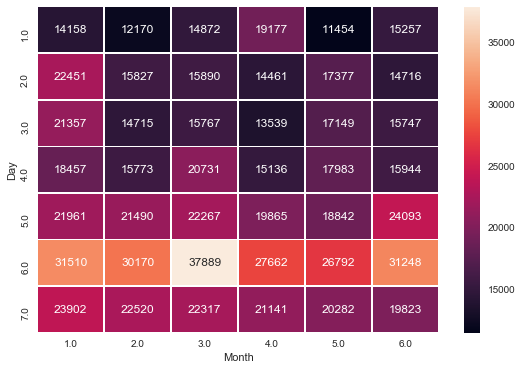

In [95]:
groupped = df_visit.groupby(['Month','Day'])['Customer_ID'].nunique().reset_index(name='Unique_Customer_Name')
groupped.head(5)
pivot = groupped.pivot("Day","Month","Unique_Customer_Name")
sns.set()
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(pivot, annot=True, fmt="d", linewidths=.5, ax=ax)    

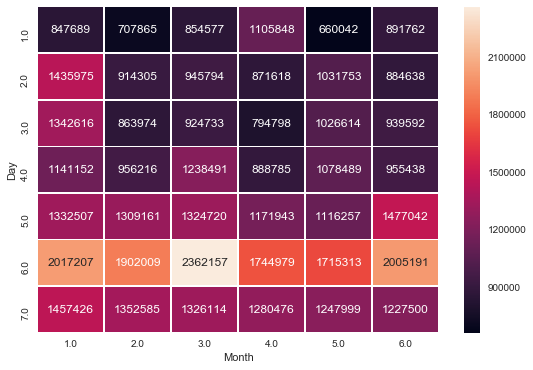

In [104]:
groupped = df_visit.groupby(['Month','Day'])['Dwell_Time'].sum().reset_index(name='Dwell_Time')
groupped.head(5)
pivot = groupped.pivot("Day","Month","Dwell_Time")
sns.set()
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(pivot, annot=True, fmt="d", linewidths=.5, ax=ax)    

In [136]:
groupped = df_visit.groupby(['Day','Store_ID'])['Customer_ID'].nunique().reset_index(name='Unique_Customer')
days = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}
for i in days.keys():
    print(i)
    temp = groupped[groupped['Day']==i].sort_values(by=['Unique_Customer'], ascending=False).head(10)
    exec('{} = temp'.format(days[i]))  
    
frames = [Mon, Tue, Wed, Thu, Fri, Sat, Sun]
all = pd.concat(frames)

1
2
3
4
5
6
7


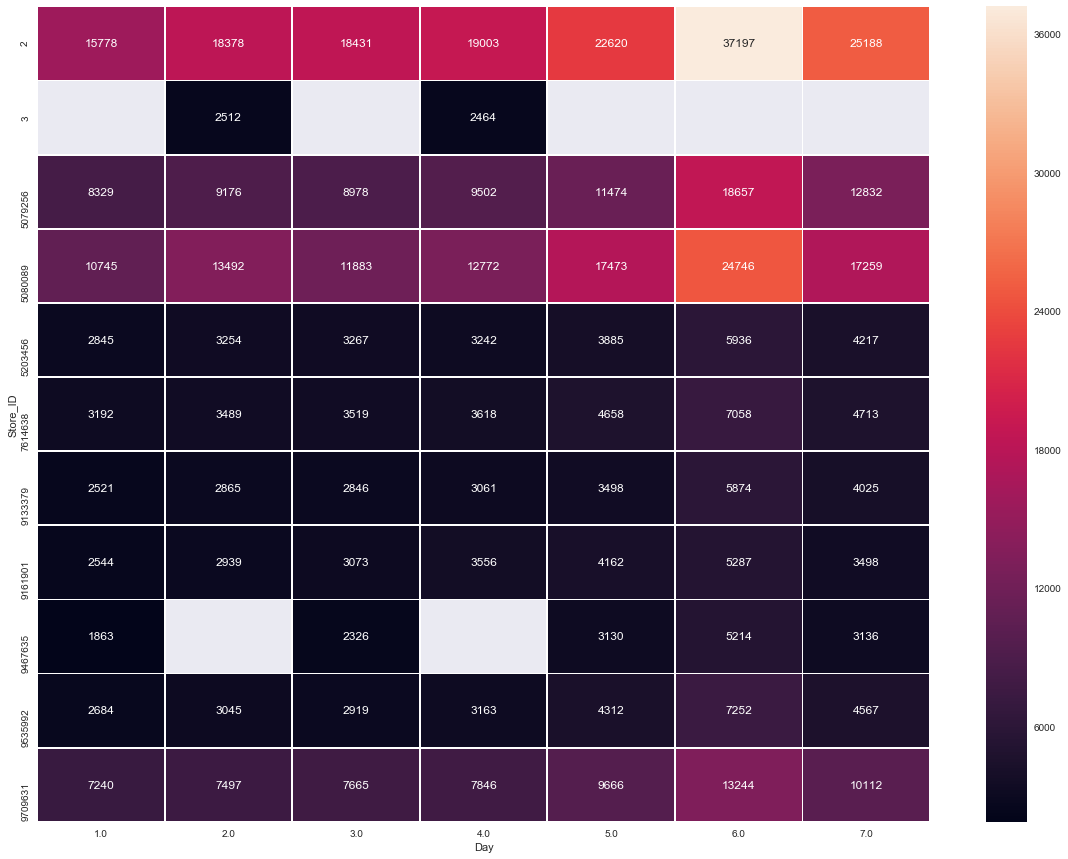

In [154]:
f,ax = plt.subplots(figsize=(20,15))
pivot = all.pivot("Store_ID","Day","Unique_Customer")
sns.set()
sns.heatmap(pivot, annot=True, fmt=".0f", linewidths=.8, ax=ax)  

In [167]:
groupped = df_visit.groupby(['Day','Store_ID'])['Dwell_Time'].sum().reset_index(name='Dwell_Time')
stores = {2:'aaa',5080089:'bbb',5079256:'ccc',9709631:'ddd',7614638:'eee',5203456:'fff',9535992:'ggg',9161901:'hhh',9133379:'iii',9467635:'jjj',3:'kkk'}
for i in stores.keys():
    print(i)
    temp = groupped[groupped['Store_ID']==i]
    exec('{} = temp'.format(stores[i]))  
    
frames = [aaa, bbb, ccc, ddd, eee, fff, ggg ,hhh ,iii ,jjj ,kkk]
all = pd.concat(frames)


2
5080089
5079256
9709631
7614638
5203456
9535992
9161901
9133379
9467635
3


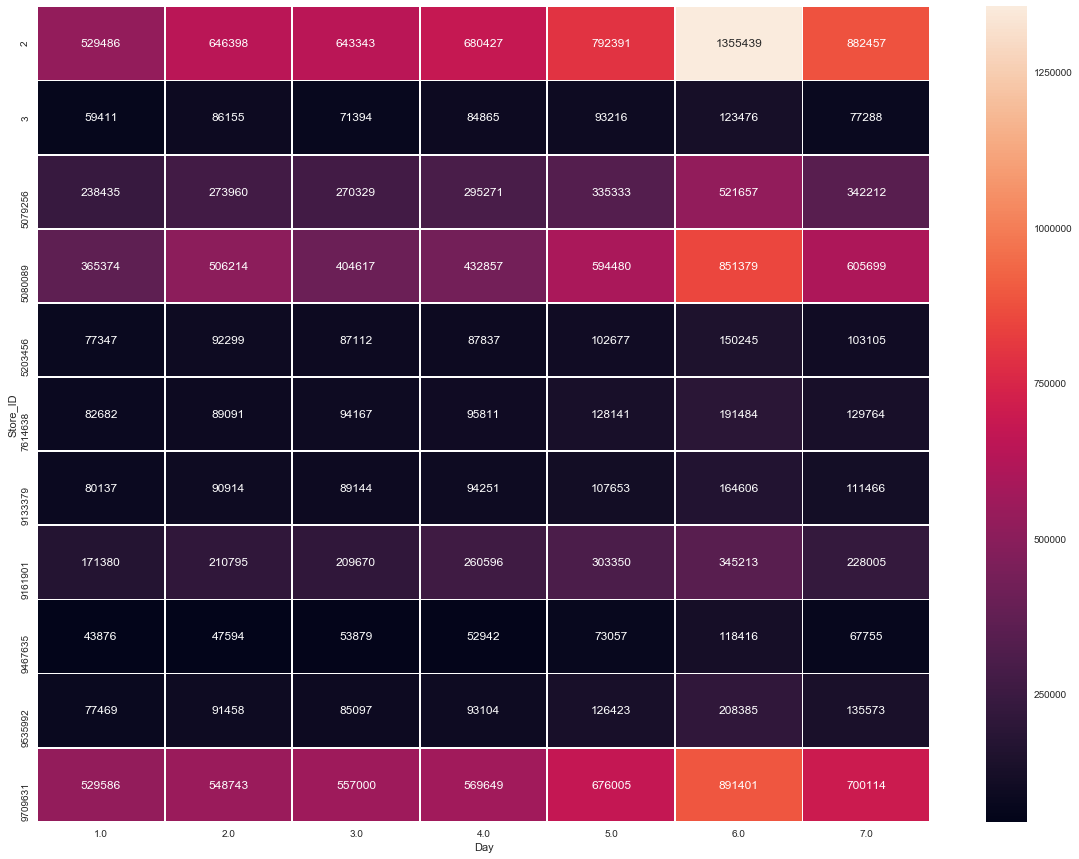

In [168]:
f,ax = plt.subplots(figsize=(20,15))
pivot = all.pivot("Store_ID","Day","Dwell_Time")
sns.set()
sns.heatmap(pivot, annot=True, fmt=".0f", linewidths=.8, ax=ax)  

array([      2, 5080089, 5079256, 9709631, 7614638, 5203456, 9535992,
       9161901, 9133379, 9467635,       3], dtype=int64)